# 선형회귀

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [6]:
# KNN 회귀로 예측을 못한 50cm 농어의 무게를 예측
lr.predict([[50]])
# knn보다 나은 예측값

array([1241.83860323])

In [8]:
# coef_  >> 기울기
# intercept_ >> 절편

print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


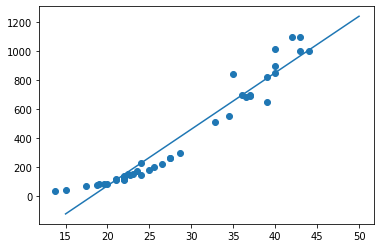

In [10]:
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.show()


In [13]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
# 과대적합 됨을 확인할 수 있음.
# 근데 사실 훈련 세트 점수도 그다지 높지 않음. 전체적으로 과소적합됨.


0.939846333997604
0.8247503123313558


그래프 왼쪽을 보면 이상하다.<br>
해당 직선대로 예측하면 농어의 무게가 0g이하로 내려갈텐데 그런 일은 있을 수 없다.<br>
따라서 직선보다는 곡선이 조금 더 효율적일 것이다.


# 다항회귀

In [21]:
# 2차 방정식의 그래프를 그리려면 길이를 제곱한 값이 훈련 데이터에 들어가야한다.
# numpy를 통해 쉽게 만들 수 있다.

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [24]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [25]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


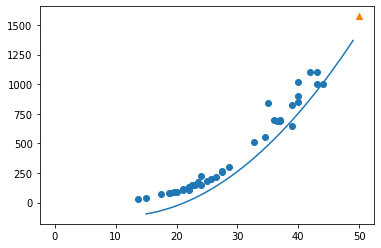

In [28]:
point = np.arange(15,50)

plt.scatter(train_input,train_target)
plt.plot(point, 1.01*point**2 -21.55*point, 116.05)

plt.scatter(50,1574, marker='^')
plt.show()

In [32]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 이전 보다 점수 향상됨 !!
## 근데 테스트 세트 점수가 더 높음 --> 과소적합이 남아있는 것 같다...

0.9706807451768623
0.9775935108325122


# 다중회귀(새로운 특성을 만들어서 모델을 복잡하게 --> 과소적합 해결)

In [33]:
import pandas as pd
df = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [35]:
# perch_full -> 길이, 높이, 두께
# perch_weight -> 무게(타깃)

train_input, test_input, train_target, test_target = train_test_split(perch_full,perch_weight, random_state=42)

## PolynomialFeatures 클래스는 각 특성을 서로 곱한 값을 추가해준다,

In [39]:
from sklearn.preprocessing import PolynomialFeatures

# 예시
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
# 서로 곱해진 값들이 특성에 추가됨

[[2. 3. 4. 6. 9.]]


In [42]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [44]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [46]:
test_poly = poly.transform(test_input)

# 다중회귀 모델 훈련하기

In [49]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [51]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 아주 높은 점수가 나옴!!!  특성이 늘어나니 선형회귀의 능력이 강력해짐을 알 수 있음!!!
# 과소적합 문제도 해결됨.


0.9903183436982124
0.9714559911594134


### 특성을 더 추가하면 어떻게 될까?
degree 매개변수로 추가가능

In [55]:
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [58]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
# 거의 완벽한 점수가 나옴 ㄷㄷ

0.9999999999991097


In [60]:

print(lr.score(test_poly, test_target))
# 음수가 나온 이유-> 특성이 많아질수록 훈련이 잘되겠지만 과대적합이 심하게 되기 때문에 형편없는 점수를 만듦.

-144.40579242684848


# 규제 (모델이 훈련을 과도하게 하는 것을 방지)
### 선형 회귀의 경우 특성에 곱해지는 계수(가중치)의 크기를 작게 만드는 일

In [65]:
# 규제 이전에 정규화를 해줌

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지 회귀 vs 라쏘 회귀
선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 부른다

# 릿지 회귀

In [68]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615397


릿지와 라쏘 모델을 사용할 때 규제의 양을 매개변수 alpha를 통해 조절할 수 있다.

alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고  조금 더 과소적합 되도록 유도합니다.<br>
반대로 alpha 값이 작으면 과대적합 될 가능성이 높아짐

alpha 값은 모델이 자동으로 정하는 것이 아니라 사람이 직접 설정해야하는 파라미터이다. 이런 파라미터를 하이퍼 파라미터라고 한다,

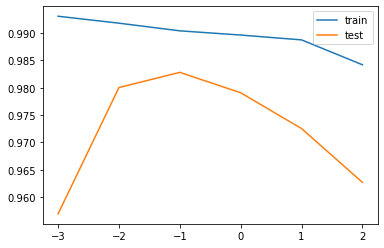

In [72]:
# 적절한 alpha값을 찾기 위해 R^2 값의 그래프를 그려보는 것이다.
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))


plt.plot(np.log10(alpha_list),train_score, label='train')
plt.plot(np.log10(alpha_list),test_score, label='test')
plt.legend()
plt.show()

# alpha 값이 0.1일때 적절함을 알 수 있음

In [73]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9903815817570366
0.9827976465386926


# 라쏘 회귀
릿지와 매우 비슷함

In [74]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

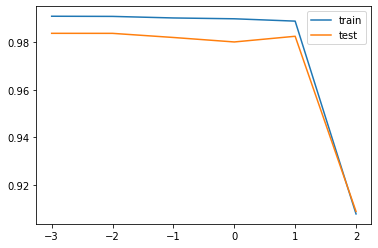

In [76]:
# 적절한 alpha값을 찾기 위해 R^2 값의 그래프를 그려보는 것이다.
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha)
  lasso.fit(train_scaled, train_target)

  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))


plt.plot(np.log10(alpha_list),train_score, label='train')
plt.plot(np.log10(alpha_list),test_score, label='test')
plt.legend()
plt.show()

# alpha 값이 10일때 적절함을 알 수 있음

In [78]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


##  라쏘 모델은 계수(가중치)의 값을 0으로 만들 수도 있다,
몇개가 0으로 지정되었는지 확인하자

In [80]:
print(np.sum(lasso.coef_==0))

40


> 무려 55개 중 40개의 특성의 계수가 0이 되었다. <br>
이처럼 라쏘 모델은 유용한 특성을 골라내는 용도로 활용될 수도 있다.